In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

df = pd.read_excel("../Data/titanic3.xls")
df

In [7]:
def clean_data(dataframe):
    return (dataframe
            .loc[:, ['pclass', 'age', 'sibsp', 'parch', 'fare']]
            .dropna()
            )

titanic_X = clean_data(df)
titanic_y = df['survived'].loc[titanic_X.index]

In [ ]:
# dont need to standardize data since its a decision tree (unless we want to compare to logistic regression)

In [10]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, random_state=42)

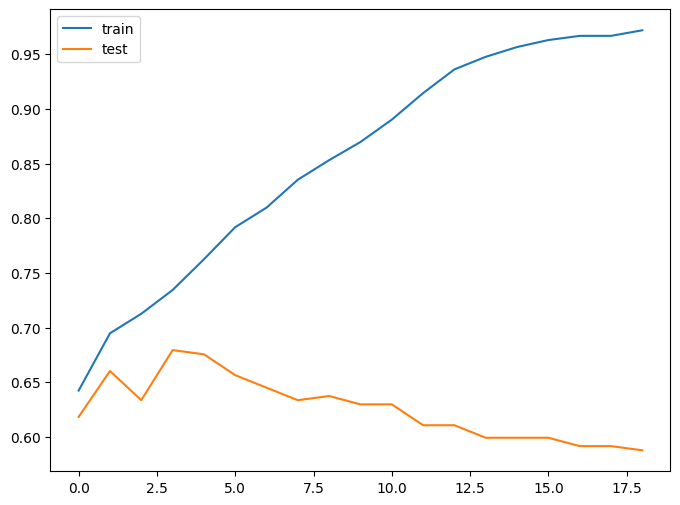

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))